# Fisher's Exact Test
## Notebook related to this blog @ [Medium](https://towardsdatascience.com/fishers-exact-fb49432e55b5?gi=270fe52c10e2)

https://towardsdatascience.com/fishers-exact-fb49432e55b5?gi=270fe52c10e2 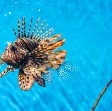

In [1]:
import numpy as np, pandas as pd
from scipy.stats import fisher_exact as f
from scipy.stats import chi2_contingency as c
from scipy.stats import hypergeom

$$Hypergeometric\hspace{1mm}problem: \frac{\binom{20}{6} \binom{10}{2}}{\binom{30}{8}}$$

|Column 1| Column 1|
|--|--|
|a|b|
|c| d|

$$Odds\hspace{1mm} ratio=\frac{\frac{a}{b}}{\frac{c}{d}}=\frac{ad}{bc}$$

In [2]:
table = np.array([[ 5, 25],
       [ 0, 10]])

# table = np.array([[ 4, 26],
#        [ 1, 9]])

# table = np.array([[ 0, 30],
#        [ 5, 5]])


# extreme example
table = np.array([[ 10, 3],
       [ 1, 20]])

In [3]:
c(table)

(15.949268123181168,
 6.506292973020608e-05,
 1,
 array([[ 4.20588235,  8.79411765],
        [ 6.79411765, 14.20588235]]))

In [4]:
table, totals= table,table.sum(axis=1)

In [5]:
table = pd.DataFrame((table), columns=['Atlantic', 'Indian'])

In [6]:
table['Total'] = table.sum(axis=1)

In [7]:
table = pd.concat((table,pd.DataFrame(table.sum(axis=0)).transpose()))

In [8]:
table.index = ['Shark', 'Whale','Total']
table

,Atlantic,Indian,Total
Shark,10,3,13
Whale,1,20,21
Total,11,23,34


In [9]:
table1 = table

In [10]:
table = table.iloc[0:2][['Atlantic','Indian']].to_numpy()

In [11]:
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
p = hypergeom.pmf(np.arange(start, end+1), M, n, N)
p 

array([1.23285132e-03, 1.60270671e-02, 8.01353356e-02, 2.03420467e-01,
       2.90600667e-01, 2.44104561e-01, 1.22052280e-01, 3.58977295e-02,
       5.98295492e-03, 5.24820607e-04, 2.09928243e-05, 2.72634081e-07])

In [12]:
start, end

(0, 11)

In [13]:
probs = pd.DataFrame([(i,el) for i,el in enumerate(p)], columns=['X', 'Probability'])
probs

,X,Probability
0,0,1.232851e-03
1,1,1.602707e-02
2,2,8.013534e-02
3,3,2.034205e-01
4,4,2.906007e-01
5,5,2.441046e-01
6,6,1.220523e-01
7,7,3.589773e-02
8,8,5.982955e-03
9,9,5.248206e-04


In [14]:
probs[probs.Probability <= 0.217]

,X,Probability
0,0,1.232851e-03
1,1,1.602707e-02
2,2,8.013534e-02
3,3,2.034205e-01
6,6,1.220523e-01
7,7,3.589773e-02
8,8,5.982955e-03
9,9,5.248206e-04
10,10,2.099282e-05
11,11,2.726341e-07


In [15]:
probs[probs.Probability <= 0.217].sum()

X              57.000000
Probability     0.465295
dtype: float64

In [16]:
f(table, alternative='two-sided')

(66.66666666666667, 2.1265458352417724e-05)

In [17]:
f(table, alternative='greater')

(66.66666666666667, 2.1265458352417714e-05)

In [18]:
f(table, alternative='less')

(66.66666666666667, 0.9999997273659186)

In [19]:
table

array([[10,  3],
       [ 1, 20]], dtype=int64)